

# Description:

Personalized Medical Recommendation System

# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv('Training.csv')

In [3]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [10]:
# vals = dataset.values.flatten()

In [4]:
dataset.shape

(4920, 133)

# train test split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [35]:
# Select the first 80 columns for training
X = dataset.iloc[:, :95]

# Drop the target variable 'prognosis'
y = dataset['prognosis']

# Encode the target variable 'prognosis'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42)

# Now you can proceed with model training, evaluation, and deployment

# Training top models

In [31]:
import matplotlib.pyplot as plt

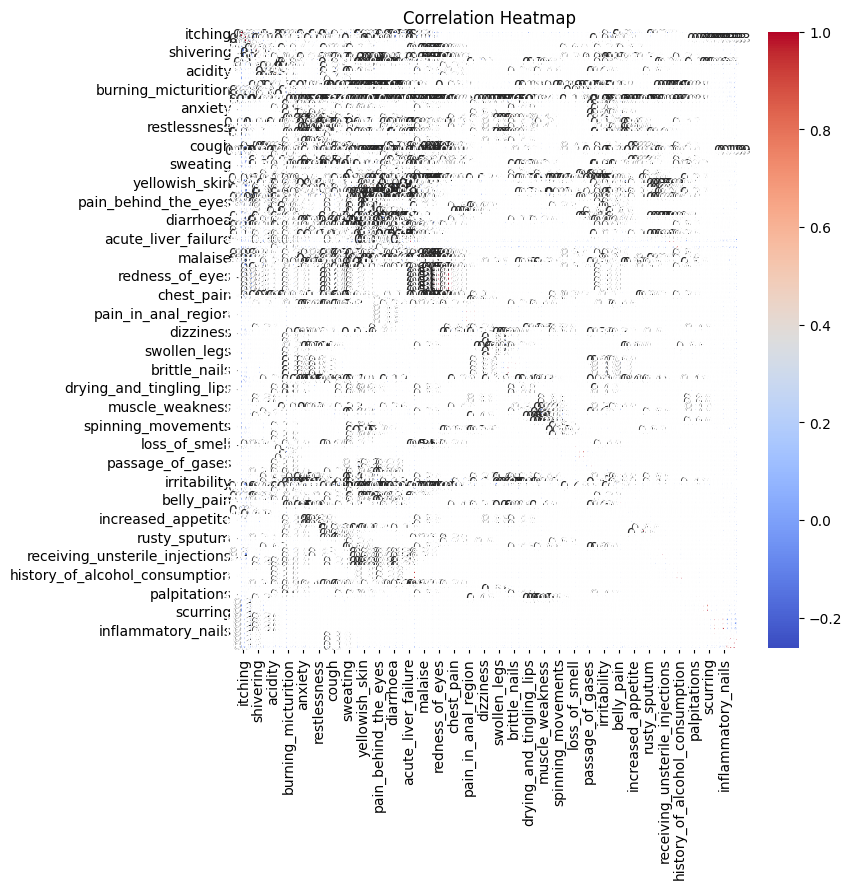

In [32]:
# correlation heatmap
import seaborn as sns
X = dataset.drop('prognosis', axis=1)
correlation_matrix= X.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

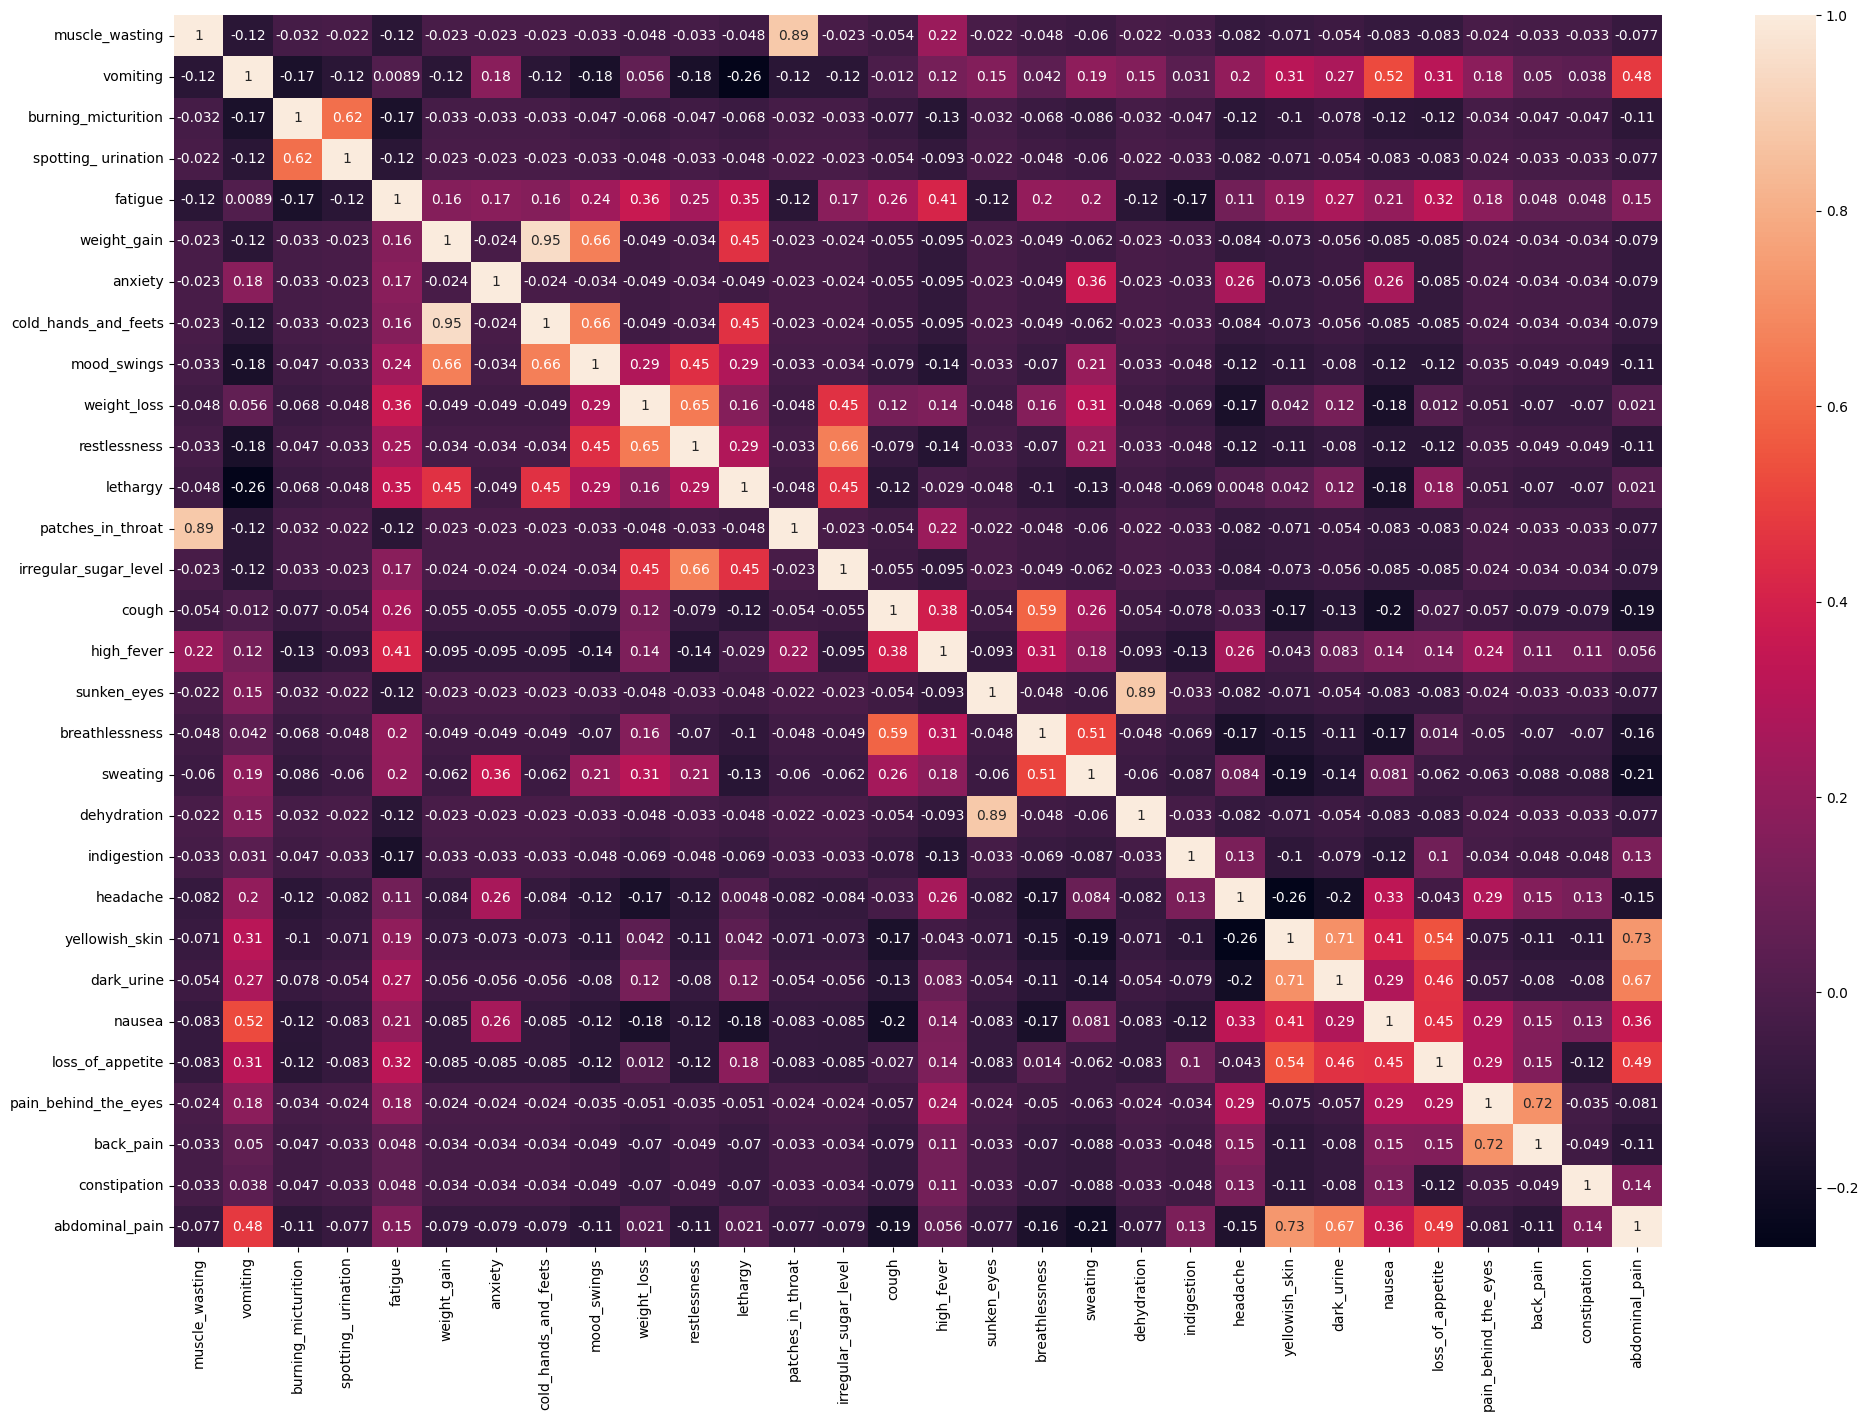

In [29]:
# heatmap with linear relation
import seaborn as sns

train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")

df_corr = train_df.iloc[:, 10:40]
plt.figure(figsize = (24, 16))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

# models

SVC Accuracy: 0.8719999999999999
SVC Precision: 0.8830662896194832
SVC Recall: 0.858
SVC F1-Score: 0.8702864491885522


RandomForest Accuracy: 0.8989999999999998
RandomForest Precision: 0.912668554476807
RandomForest Recall: 0.884
RandomForest F1-Score: 0.897477272116794


GradientBoosting Accuracy: 0.9030000000000001
GradientBoosting Precision: 0.9261921300763843
GradientBoosting Recall: 0.876
GradientBoosting F1-Score: 0.9000929662310788


KNeighbors Accuracy: 0.8140000000000001
KNeighbors Precision: 0.8419996878270857
KNeighbors Recall: 0.776
KNeighbors F1-Score: 0.8068378784730286




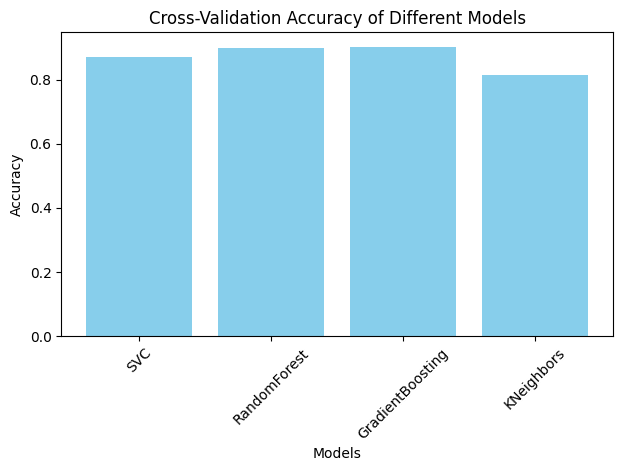

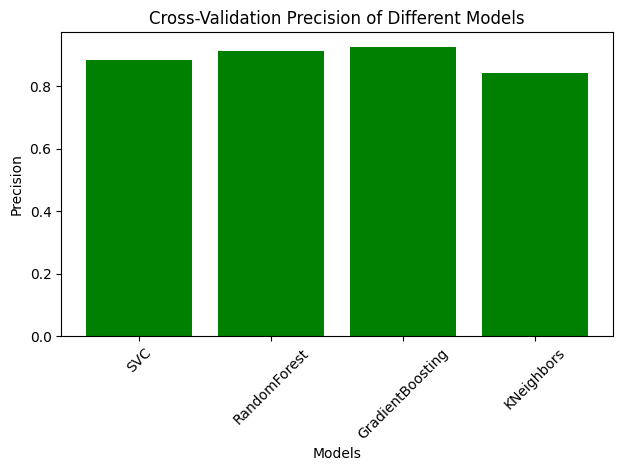

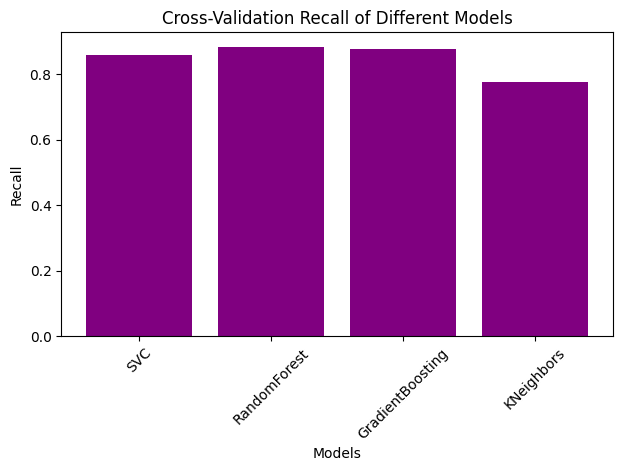

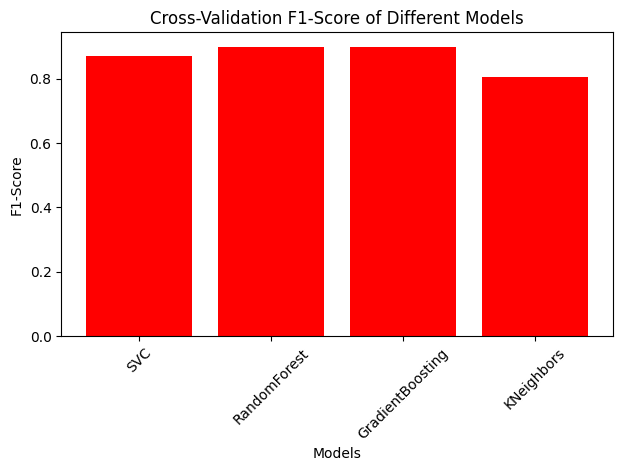

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    
}

# Define a function to calculate accuracy, precision, recall, and F1-score for each model using cross-validation
def evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    return accuracy, precision, recall, f1

# Lists to store model names, accuracies, precisions, recalls, and F1-scores
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X, y)
    
    # Append results to lists
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1-Score: {f1}")
    print("\n" + "="*40 + "\n")





# Increase figure size
plt.figure(figsize=(12, 8))

# Plotting Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracies, color='skyblue', label='Accuracy')
plt.xlabel('Models')  # Change to x-axis label
plt.ylabel('Accuracy')  # Change to y-axis label
plt.title('Cross-Validation Accuracy of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plotting Precision
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
plt.subplot(2, 2, 2)
plt.bar(model_names, precisions, color='green', label='Precision')
plt.xlabel('Models')  # Change to x-axis label
plt.ylabel('Precision')  # Change to y-axis label
plt.title('Cross-Validation Precision of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plotting Recall
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
plt.subplot(2, 2, 3)
plt.bar(model_names, recalls, color='purple', label='Recall')
plt.xlabel('Models')  # Change to x-axis label
plt.ylabel('Recall')  # Change to y-axis label
plt.title('Cross-Validation Recall of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plotting F1-score
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
plt.subplot(2, 2, 4)
plt.bar(model_names, f1_scores, color='red', label='F1-Score')
plt.xlabel('Models')  # Change to x-axis label
plt.ylabel('F1-Score')  # Change to y-axis label
plt.title('Cross-Validation F1-Score of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




SVC Accuracy: 0.8719999999999999
SVC Error: 0.1280000000000001


RandomForest Accuracy: 0.8989999999999998
RandomForest Error: 0.1010000000000002


GradientBoosting Accuracy: 0.9030000000000001
GradientBoosting Error: 0.09699999999999986


KNeighbors Accuracy: 0.8140000000000001
KNeighbors Error: 0.18599999999999994




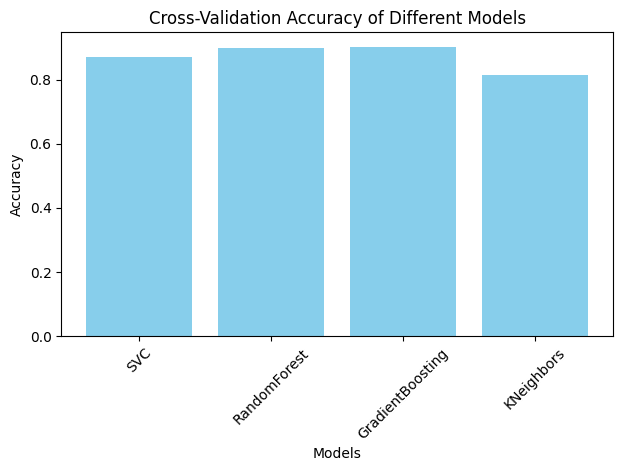

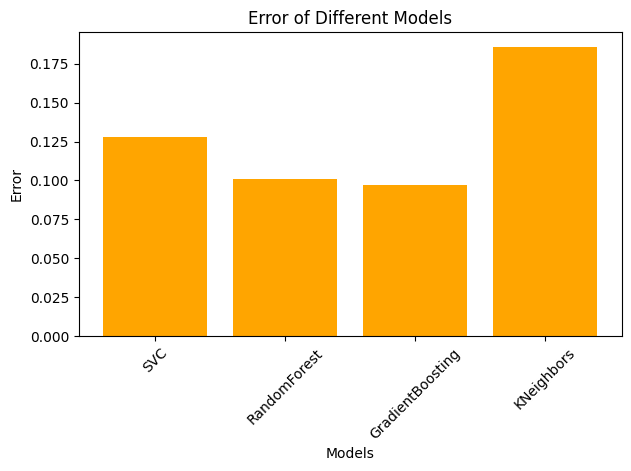

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5)
}

# Define a function to calculate accuracy and error for each model using cross-validation
def evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    error = 1 - accuracy
    return accuracy, error

# Lists to store model names, accuracies, and errors
model_names = []
accuracies = []
errors = []

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    accuracy, error = evaluate_model(model, X, y)
    
    # Append results to lists
    model_names.append(model_name)
    accuracies.append(accuracy)
    errors.append(error)

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Error: {error}")
    print("\n" + "="*40 + "\n")



# Increase figure size
plt.figure(figsize=(12, 8))

# Plotting Accuracy
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracies, color='skyblue', label='Accuracy')
plt.xlabel('Models')  # Change to x-axis label
plt.ylabel('Accuracy')  # Change to y-axis label
plt.title('Cross-Validation Accuracy of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
plt.subplot(2, 2, 2)
plt.bar(model_names, errors, color='orange', label='Error')
plt.xlabel('Models')  # Change to x-axis label
plt.ylabel('Error')  # Change to y-axis label
plt.title('Error of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



# single prediction

In [143]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [144]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [145]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [146]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [2]
Actual Disease : 2


c:\Users\Ravindra Prajapat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [147]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [23]
Actual Disease : 23


c:\Users\Ravindra Prajapat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [148]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [149]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [177]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

# acidity,  indigestion, headache, blurred_and_distorted_vision, excessive_hunger, stiff_neck
# itching,skin_rash,nodal_skin_eruptions
# chills, vomiting, fatigue, high_fever, headache, nausea, constipation, abdominal_pain
# yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
# continuous_sneezing, cough, high_fever, headache, malaise, phlegm, runny_nose, loss_of_smell, muscle_pain

print("=================Symptoms============")
print(symptoms)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================Symptoms============
itching, joint_pain, inflammatory_nails, small_dents_in_nails, silver_like_dusting, skin_peeling
=================predicted disease============
Psoriasis
=================description==================
Psoriasis is a chronic skin condition characterized by red, itchy, and scaly patches.
=================precautions==================
1 :  wash hands with warm soapy water
2 :  stop bleeding using pressure
3 :  consult doctor
4 :  salt baths
=================medications==================
5 :  ['Topical treatments', 'Phototherapy', 'Systemic medications', 'Biologics', 'Coal tar']
=================workout==================
6 :  Consume anti-inflammatory foods
7 :  Include omega-3 fatty acids
8 :  Include vitamin D analogues
9 :  Limit alcohol consumption
10 :  Stay hydrated
11 :  Consult a healthcare professional
12 :  Limit processed foods
13 :  Follow medical recommendations
14 :  Manage stress
15 :  Consider phototherapy under medical guidance
=======

c:\Users\Ravindra Prajapat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [34]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================Symptoms============")
print(symptoms)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================Symptoms============
yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care
===============

c:\Users\Ravindra Prajapat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [123]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.3.2
